In [58]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
# Import trades database

# Enter your CSV with only the column of results in points. 
# Note that the name of the column must be "points".

df = pd.read_csv('Backtest Estratégias - DTB - Sample.csv')

df.head()

,Data,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Time,Result,N,Soma
0,2020-01-13,"[Trade 1 - 11:40 {DTB 7 min} C@116.935 +39,00 ...",NaN,NaN,NaN,7,195,NaN,195
1,2020-01-15,"[Trade 1 - 12:15 {DTB 6 min} V@117.055 +33,00 ...",NaN,NaN,NaN,6,160,NaN,355
2,2020-01-22,"[Trade 1 - 12:05 {DTB 6 min} V@118.095 +4,00 (...",NaN,NaN,NaN,6,20,NaN,375
3,2020-01-24,"[Trade 1 - 12:05 {DTB 4 min} V@119.155 -11,00 ...",NaN,NaN,NaN,4,-55,NaN,320
4,2020-01-27,"[Trade 1 - 11:14 {DTB 3:50s} V@115.700 +39,00 ...",NaN,NaN,NaN,4,195,NaN,515


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         88 non-null     object 
 1   Description  88 non-null     object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Time         88 non-null     object 
 6   Result       88 non-null     int64  
 7   N            57 non-null     object 
 8   Soma         88 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 6.3+ KB


In [152]:
# Make a Clean Copy of the Original Dataframe
df_clean = df.copy()

# Drop unused columns 
df_clean.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Time'], axis=1, inplace=True)


# Convert Date 
df_clean['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d %H:%M:%S.%f')

In [153]:
# Select positive and negative trades percentage

pos_perc = df_clean.query("Result > 0").count()/df.shape[0]
neg_perc = df_clean.query("Result < 0 or Result == 0").count()/df.shape[0]

print('Porcentagem Positivos', pos_perc, 'Porcentagem Negativos:', neg_perc)

Porcentagem Positivos Data           0.454545
Description    0.454545
Result         0.454545
N              0.261364
Soma           0.454545
dtype: float64 Porcentagem Negativos: Data           0.545455
Description    0.545455
Result         0.545455
N              0.386364
Soma           0.545455
dtype: float64


### Fixing Null N Values

We use the negative trades as the base to set the N value. This value will be used in both positive and negative trades, following System Quality Number rule from Van K Tharp.


In [160]:
negative_trades = df_clean.query('Result < 0 or Result == 0')
 
n_value = negative_trades['Result'].sum()/negative_trades.shape[0]

n_value.round(0)


-81.0

In [162]:
def set_null_nvalues(x):
    
    if x < 0 or x == 0:
        if x != 'NaN':
            return -(x / n_value)
    else:
        if x != 'NaN':
            return (x / -n_value)
    
df_clean['N'] = df_clean['Result'].map(set_null_nvalues)

df_clean.sample(10)

,Data,Description,Result,N,Soma
73,2019-07-26,[Trade 1 [DTB Doji < 10 min} V@105.435 -50 pts...,-50,-0.614597,1215
45,2019-01-23,[Trade 1 {DTB Doji } C@98.035 +165 pts] E: Mer...,165,2.028169,1365
9,2020-02-11,"[Trade 1 - 13:00 {DTB 10 min} V@115.085 -23,00...",-110,-1.352113,720
59,2019-04-02,[Trade 1 {DTB < 5 min} V@97.655 0 pts] E: Can...,0,0.000000,1475
63,2019-05-10,[Trade 1 {DTB Doji < 5 min} V@95.455 +150 pts]...,150,1.843790,1625
28,2020-04-28,[Trade 1 - 10:41 {DTB Doji < 5 min} C@81050 - ...,-165,-2.028169,985
65,2019-05-29,[Trade 1 {DTB Doji < 5 min} C@98.390 - 90 pts]...,-90,-1.106274,1535
55,2019-03-22,[Trade 1 {DTB } V@97.100 ] E: Grande gap vende...,-130,-1.597951,1490
33,2020-05-15,[SIMULADOR] [Trade 1 {DTB < 5 min} V@77.915 +1...,190,2.335467,1285
80,2019-09-26,[Trade 1 {DTB < 5 min} C@106.760 +120 pts] E: ...,120,1.475032,1795


In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         88 non-null     datetime64[ns]
 1   Description  88 non-null     object        
 2   Result       88 non-null     int64         
 3   N            88 non-null     float64       
 4   Soma         88 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ KB


In [180]:
df_clean['N'].describe()

count    88.000000
mean      0.261204
std       1.571575
min      -2.335467
25%      -1.106274
50%       0.000000
75%       1.659411
max       3.687580
Name: N, dtype: float64

### Metrics

In [164]:
# Sharpe index

df_clean['Result'].mean()/df_clean['Result'].std()


0.16620494818276607

In [165]:
# Profit factor 

pos = df_clean.query("Result > 0")
neg = df_clean.query("Result < 0 or Result == 0")

pos['Result'].sum()/-(neg['Result'].sum())


1.4788732394366197

In [166]:
# Risk Reward 

rr = pos['Result'].mean()/-neg['Result'].mean()

rr

1.7746478873239435

In [167]:
# Minimum Risk Reward 

w = df_clean.query("Result > 0").count()/df_clean.shape[0]
w = pd.to_numeric(w)

(1 - w)/w

Data           1.2
Description    1.2
Result         1.2
N              1.2
Soma           1.2
dtype: float64

In [168]:
# Mathematical Expectation

In [169]:
# Expected Reward

In [170]:
# Edge

w - (1/(1+rr))


Data           0.094139
Description    0.094139
Result         0.094139
N              0.094139
Soma           0.094139
dtype: float64

In [171]:
# Kelly 

w - (1-w)/rr

Data           0.147186
Description    0.147186
Result         0.147186
N              0.147186
Soma           0.147186
dtype: float64

In [172]:
# SQN 

import math

r = (negative_trades.loc[:, "Result"].mean())

expectancy = (df_clean.loc[:, "Result"] / (-r)).mean()

r_multiple = (df_clean.loc[:, "Result"] / (-r))

standard_deviation = r_multiple.std()

square_root_num_trades = math.sqrt(len(df_clean))

sqn = round(((expectancy/standard_deviation)*square_root_num_trades), 3)

sqn

1.559

### Visualizations

In [141]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

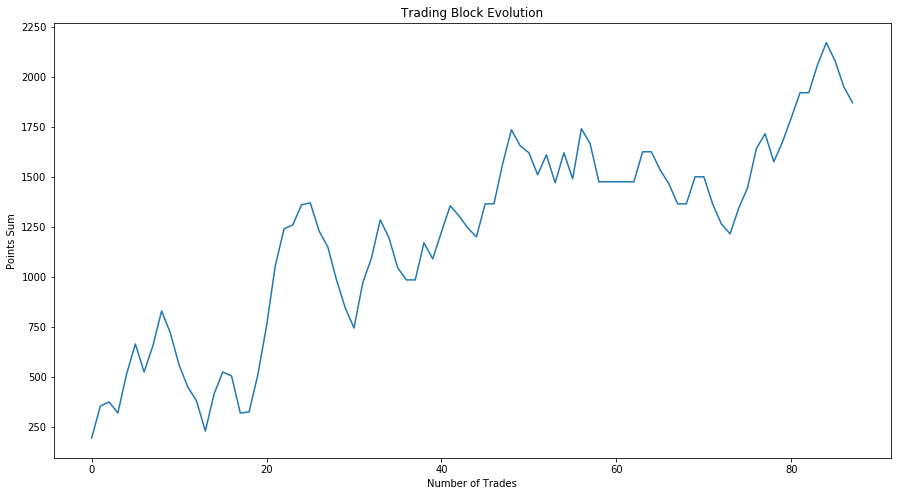

In [173]:
# Trading Block Evolution 

binsize = 10
bins = np.arange(0, df['Soma'].max()+binsize, binsize)

def graph():
    plt.plot(df.index, df['Soma'])
    
plt.figure(figsize=[15,8])    
plt.title('Trading Block Evolution')  
plt.ylabel('Points Sum')
plt.xlabel('Number of Trades')

plt.show(graph());